<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/ML_With_Python/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_%EB%85%B8%EB%93%9C10_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%E2%80%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1225]:
# 라이브러리
import pandas as pd

In [1226]:
# 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# train.shape # (39116, 16)
# test.shape # (9779, 15)
type(train)

pandas.core.frame.DataFrame

In [1227]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [1228]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [1229]:
# 데이터 타입
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [1230]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [1231]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

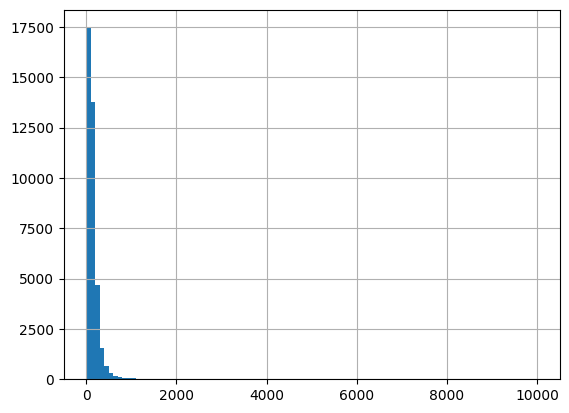

In [1232]:
# target(hist)
train['price'].hist(bins=100)

In [1233]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [1234]:
import numpy as np
# train['price'] = np.log1p(train['price'])
# train['price'].hist(bins=100)

In [1235]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


In [1236]:
# 결측치 컬럼 삭제(last_review)
display(train.columns)
train['last_review'].isnull().sum()
#train[['last_review', 'reviews_per_month']]
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

# train.shape # (39116, 15)
# test.shape # (9779, 14)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [1237]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0.0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0.0)

# train.shape # (39116, 15)
# test.shape # (9779, 14)

In [1238]:
# 결측치 확인
train.isnull().sum()
test.isnull().sum()



id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [1239]:
cond = train['name'].isnull() | train['host_name'].isnull()
# train[cond]

In [1240]:
# 가격 값 복사
target = train['price']
target.head()
train = train.drop('price', axis=1)
train.head()

# train.shape # (39116, 14)
# test.shape # (9779, 14)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,28,0,0.00,1,0


In [1241]:
# 수치형 피처 선택

type(train)
train.info()

cols = train.select_dtypes(exclude='object').columns
cols
train[cols]

#display(cols)
#train.corr()['price'] >= 0.01

cols = ['host_id',
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
        ]

train = train[cols]
test = test[cols]

# 레이블 인코딩
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# train['neighbourhood'] = le.fit_transform(train['neighbourhood'])
# test['neighbourhood'] = le.fit_transform(test['neighbourhood'])

# 표준화
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train = scaler.fit_transform(train)
# test = scaler.transform(test)

# 정규화
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train = scaler.fit_transform(train)
# test = scaler.transform(test)

# train.shape # (39116, 8)
# test.shape # (9779, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  reviews_per_month               39116 non-null  float64
 12  calculated_host_listings_count  

In [1242]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=0)

print(train.shape) # (39116, 8)
print(target.shape) # (39116,)
print(X_train.shape) # (29337, 8)
print(X_test.shape) # (9779, 8)
print(y_train.shape) # (29337,)
print(y_test.shape) # (9779,)

# train.shape # (39116, 8)
# test.shape # (9779, 8)

(39116, 8)
(39116,)
(27381, 8)
(11735, 8)
(27381,)
(11735,)


In [1243]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

# train.shape # (39116, 8)
# test.shape # (9779, 8)

60962.83403649707

In [1244]:
# 릿지 회귀 (alpha=1)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

# train.shape # (39116, 8)
# test.shape # (9779, 8)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.06028e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


60963.66552352874

In [1245]:
# 라쏘 회귀 (alpha=1)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
model = Lasso(alpha=1) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

# train.shape # (39116, 8)
# test.shape # (9779, 8)

61589.124152693366

In [1246]:
# 엘리스틱 회귀 (alpha=1)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1) # alpha의 기본값은 1
model.fit(X_train, y_train) # 훈련, 학습
pred = model.predict(X_test) # 예축
mean_squared_error(y_test, pred) # 검증

# train.shape # (39116, 8)
# test.shape # (9779, 8)

62383.82777741967

In [1247]:
# 랜덤포레스트 회귀
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# model = RandomForestRegressor(random_state=0)

# model.fit(X_train, y_train)
# pred = model.predict(X_test)

# mean_squared_error(y_test, pred) # MSE

# train.shape # (39116, 8)
# test.shape # (9779, 8)

In [1248]:
# 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 튜닝 대상 하이퍼파라미터 지정
params = {'learning_rate': [0.07, 0.05, 0.1],
          'max_depth': [5, 7, 10],
          'n_estimators': [100, 200, 300],
          'subsample': [0.9, 0.8, 0.7]
          }

# GridSearchCV
# from xgboost import XGBRegressor
# xgb = XGBRegressor() # model 생성
# grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1)
# grid.fit(train, target)

# 최적의 하이퍼파라미터를 찾음 => 비용 & 시간 많이 소모
# grid.best_params_

# {'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
# {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}

# 하이퍼파라미터 튜닝
model = XGBRegressor(
    learning_rate = 0.1,
    max_depth = 10,
    n_estimators = 100,
    subsample = 0.8
    )

# xgboost 회귀
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

#model = XGBRegressor(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred) # MSE

# train.shape # (39116, 8)
# test.shape # (9779, 8)


54283.942136218946

In [1249]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('y_test.csv')

# y_test.shape # (9779, 1)
# train.shape # (39116, 8)
# test.shape # (9779, 8)

# Xgboost
pred = model.predict(test)
my_score = mean_squared_error(y_test, pred)
my_score

48355.31521059619

In [1250]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print(f'나의 점수는 (MSE {my_score})입니다.')
# 나의 점수는 (MSE 50491.801331459596)입니다. <= 표준화만 적용
# 나의 점수는 (MSE 54059.38283334756)입니다. <= 정규화만 적용

나의 점수는 (MSE 48355.31521059619)입니다.
